<a href="https://colab.research.google.com/github/saidineshpola/Knowledge-Distillation-Toolkit/blob/main/F1_Team_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

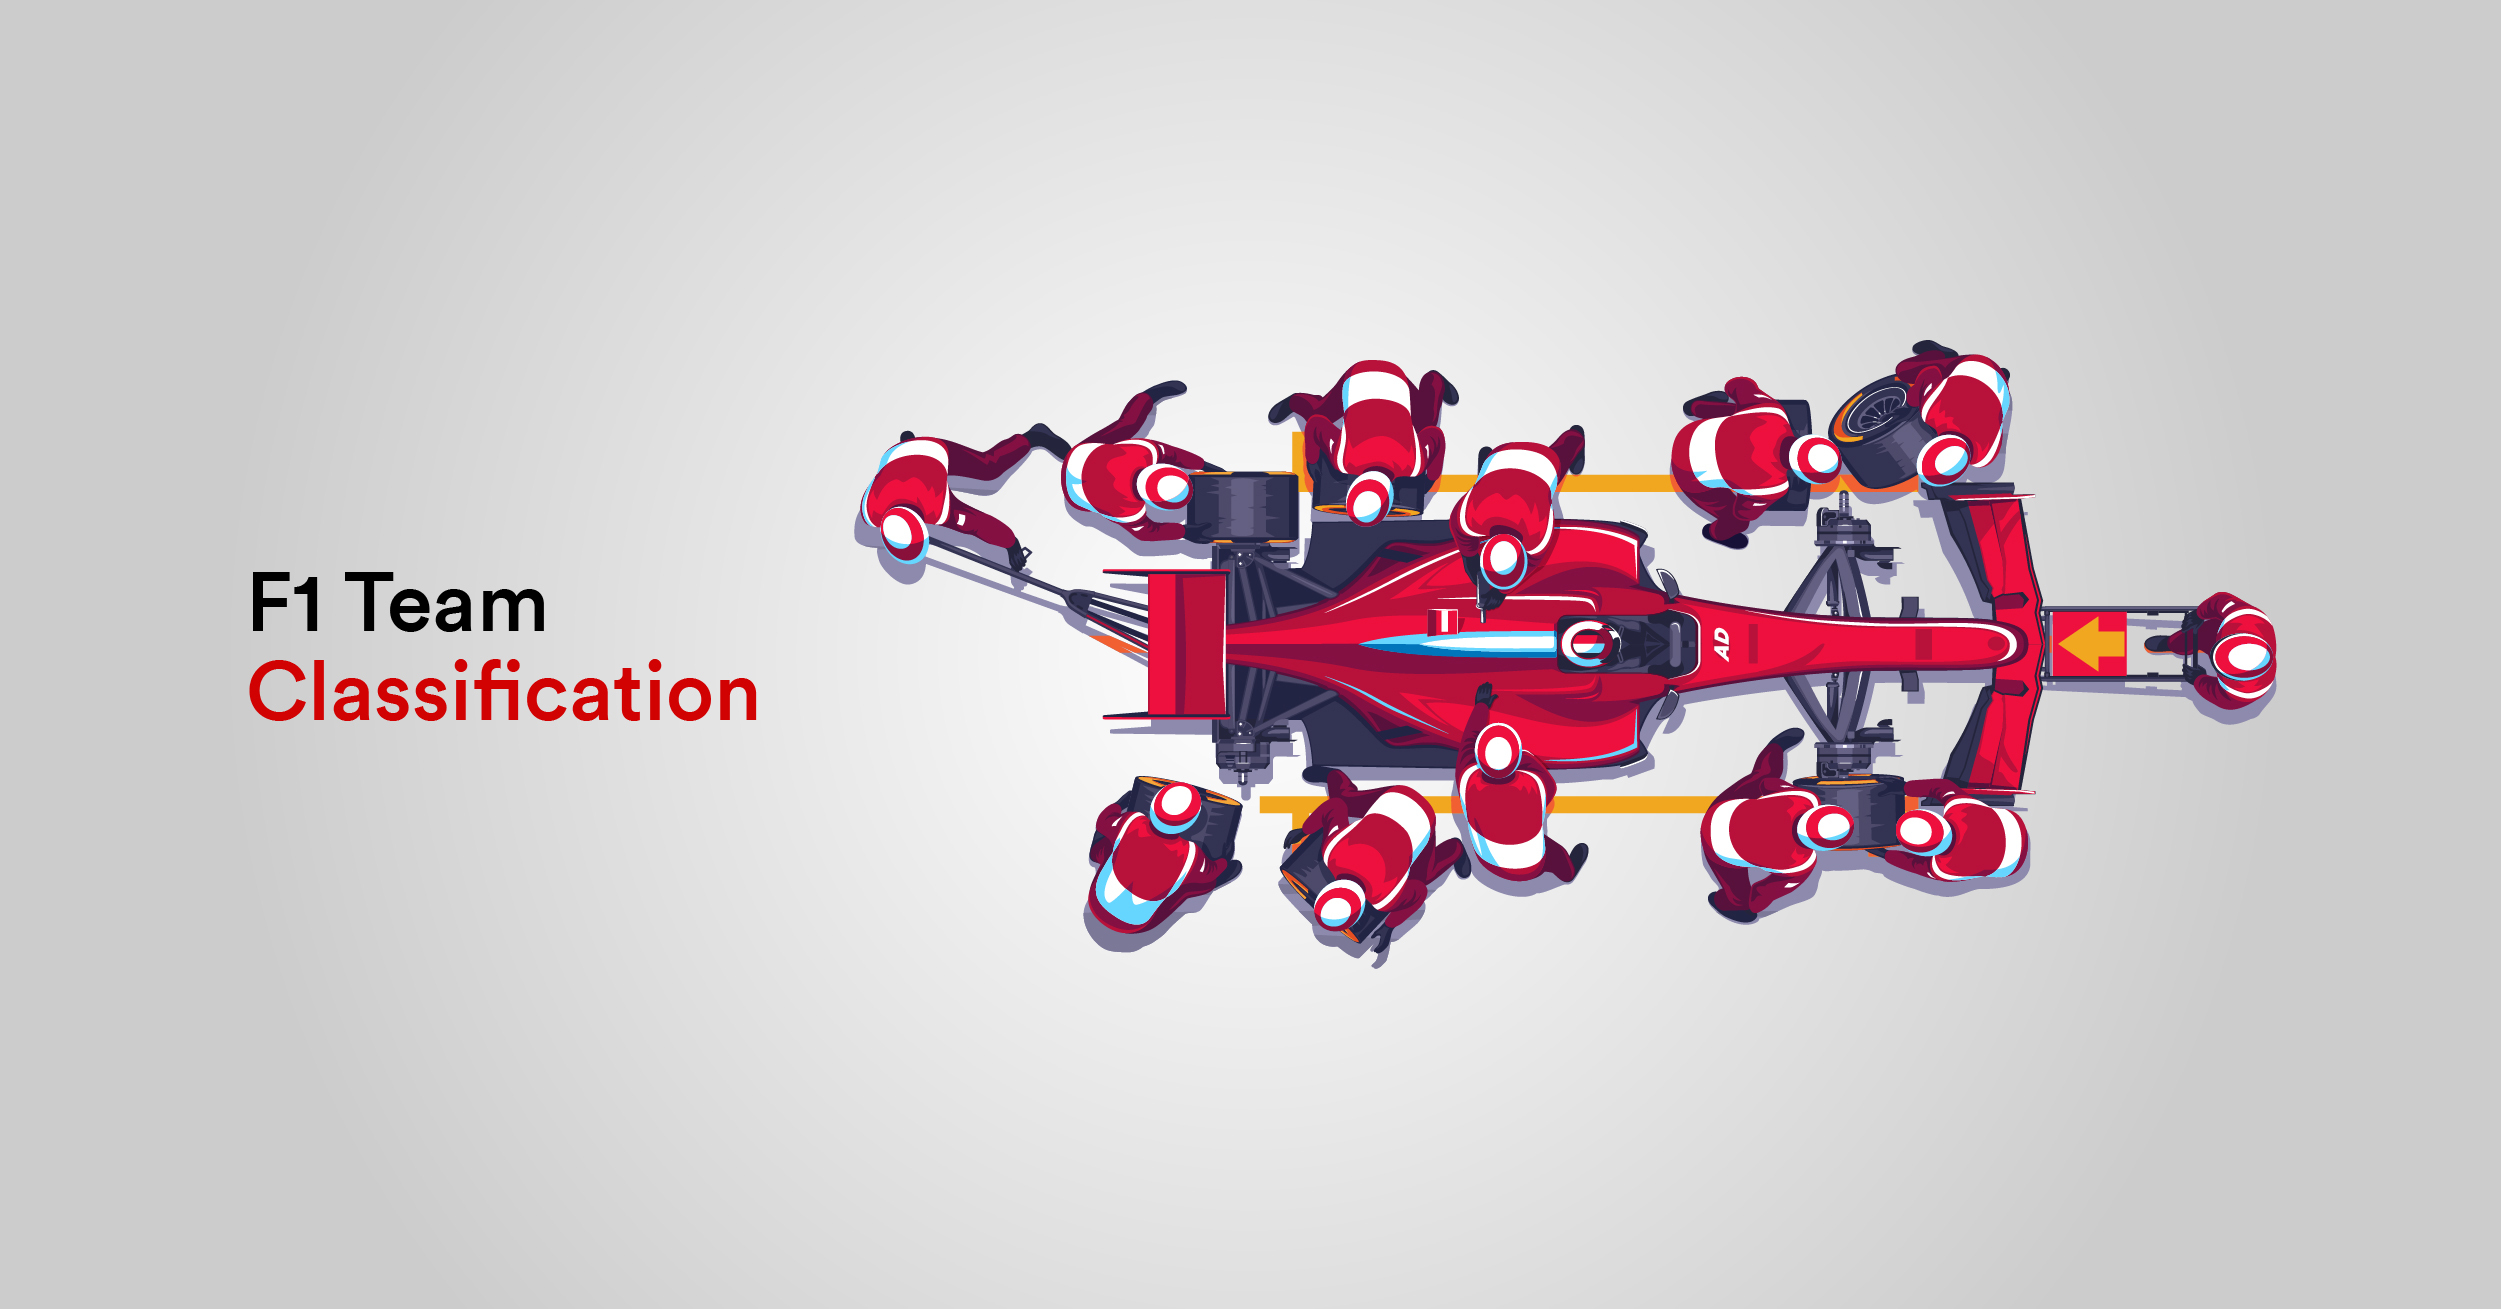

# Getting Started Code for [F1 Team Classification Challenge](https://www.aicrowd.com/challenges/team-classification) on AIcrowd
#### Author : Shubhamai

## Download Necessary Packages 📚

In [ ]:
!pip install --upgrade fastai 
!pip install aicrowd-cli

     |████████████████████████████████| 204kB 25.7MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 174kB 38.5MB/s 
     |████████████████████████████████| 204kB 49.5MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 81kB 10.7MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
     |████████████████████████████████| 71kB 12.0MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully unins

## Download Data ⏬
The first step is to download out train test data. We will be training a model on the train data and make predictions on test data. We submit our predictions.


In [ ]:
API_KEY = '6c4dc1818e928ae4f5ca02323114f662' #Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [ ]:
!aicrowd dataset download --challenge f1-team-classification -j 3 

train.csv:   0% 0.00/569k [00:00<?, ?B/s]
train.csv: 100% 569k/569k [00:00<00:00, 1.87MB/s]

sample_submission.csv: 100% 134k/134k [00:00<00:00, 727kB/s]
val.csv: 100% 52.9k/52.9k [00:00<00:00, 593kB/s]
train.zip:   0% 0.00/391M [00:00<?, ?B/s]
train.zip:   9% 33.6M/391M [00:02<00:28, 12.7MB/s]

val.zip:   0% 0.00/38.9M [00:00<?, ?B/s]
train.zip:  26% 101M/391M [00:06<00:18, 16.0MB/s] 

val.zip:  86% 33.6M/38.9M [00:04<00:00, 6.89MB/s]

val.zip: 100% 38.9M/38.9M [00:04<00:00, 7.81MB/s]
train.zip:  34% 134M/391M [00:08<00:15, 16.2MB/s]
train.zip:  43% 168M/391M [00:11<00:14, 15.3MB/s]
test.zip: 100% 97.7M/97.7M [00:11<00:00, 8.68MB/s]
train.zip: 100% 391M/391M [00:24<00:00, 15.9MB/s]


Below, we create a new directory to put our downloaded data! 🏎

We unzip the ZIP files and move the CSVs.

In [ ]:
!rm -rf data
!mkdir data

!unzip train.zip  -d data/train
!unzip val.zip -d data/val
!unzip test.zip  -d data/test

!mv train.csv data/train.csv
!mv val.csv data/val.csv
!mv sample_submission.csv data/sample_submission.csv

Streaming output truncated to the last 5000 lines.
  inflating: data/test/5042.jpg      
  inflating: data/test/5043.jpg      
  inflating: data/test/5045.jpg      
  inflating: data/test/5046.jpg      
  inflating: data/test/5047.jpg      
  inflating: data/test/5048.jpg      
  inflating: data/test/5049.jpg      
  inflating: data/test/505.jpg       
  inflating: data/test/5050.jpg      
  inflating: data/test/5051.jpg      
  inflating: data/test/5052.jpg      
  inflating: data/test/5053.jpg      
  inflating: data/test/5054.jpg      
  inflating: data/test/5055.jpg      
  inflating: data/test/5056.jpg      
  inflating: data/test/5057.jpg      
  inflating: data/test/5058.jpg      
  inflating: data/test/5059.jpg      
  inflating: data/test/506.jpg       
  inflating: data/test/5060.jpg      
  inflating: data/test/5061.jpg      
  inflating: data/test/5063.jpg      
  inflating: data/test/5064.jpg      
  inflating: data/test/5065.jpg      
  inflating: data/test/5066.jpg      


## Import packages

In [ ]:
import pandas as pd
from fastai.vision.all import *
from fastai.data.core import *
import os

## Load Data
- We use pandas 🐼 library to load our data.   
- Pandas loads the data into dataframes and facilitates us to analyse the data.   
- Learn more about it [here](https://www.tutorialspoint.com/python_data_science/python_pandas.htm) 🤓

In [ ]:
data_folder = "data"

In [ ]:
train_df = pd.read_csv(os.path.join(data_folder, "train.csv"))

## Visualize the data 👀

Using Pandas and the Matplot Library in Python, we will be viewing the images in our datasets.

In [ ]:
train_df

,ImageID,label
0,0,redbull
1,1,mercedes
2,2,redbull
3,3,redbull
4,4,redbull
...,...,...
39995,39995,redbull
39996,39996,redbull
39997,39997,redbull
39998,39998,redbull


Adding .jpg to all the ImageIDs in "ImageID" column. This will help us with adding the path behind the names of these images.

In [ ]:
train_df['ImageID'] = train_df['ImageID'].astype(str)+".jpg"
train_df

,ImageID,label
0,0.jpg,redbull
1,1.jpg,mercedes
2,2.jpg,redbull
3,3.jpg,redbull
4,4.jpg,redbull
...,...,...
39995,39995.jpg,redbull
39996,39996.jpg,redbull
39997,39997.jpg,redbull
39998,39998.jpg,redbull


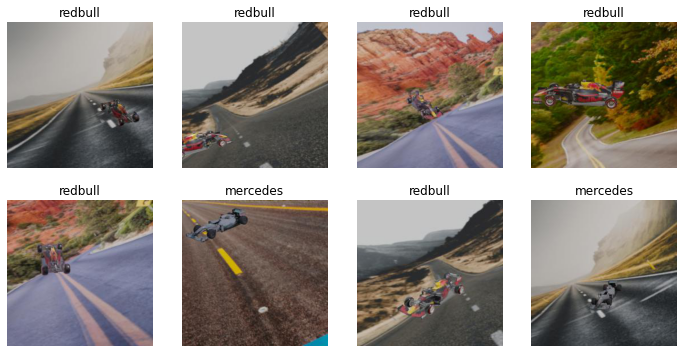

In [ ]:
dls = ImageDataLoaders.from_df(train_df, path=os.path.join(data_folder, "train"), bs=8)

# Defining a function to take a look at the images
dls.show_batch()

# TRAINING PHASE 🏋️
Now that we have the dataset is ready, it's time to create a model that we will train on our data!

In [ ]:
# learn = cnn_learner(dls, alexnet, metrics=F1Score())
learn = cnn_learner(dls, alexnet, pretrained=False,  metrics=F1Score(), lr=0.0001)

## Train the Model 🏃🏽‍♂️

In [ ]:
learn.fine_tune(1, base_lr=0.0001)

epoch,train_loss,valid_loss,f1_score,time
0,0.944892,0.611945,0.648956,01:38


epoch,train_loss,valid_loss,f1_score,time
0,0.466151,0.239333,0.923245,01:49


# Testing Phase 😅

We are almost done. We trained and validated on the training data. Now its the time to predict on test set and make a submission.

## Load Test Set

Load the test data on which final submission is to be made.

In [ ]:
test_imgs_name = get_image_files(os.path.join(data_folder, "test"))
test_dls = dls.test_dl(test_imgs_name)

# Convert categorical values into label names
class_to_label_mapping = {v: k for v, k in enumerate(dls.vocab)}
print(class_to_label_mapping)

test_img_ids = [re.sub(r"\D", "", str(img_name)) for img_name in test_imgs_name]

{0: 'mercedes', 1: 'redbull'}


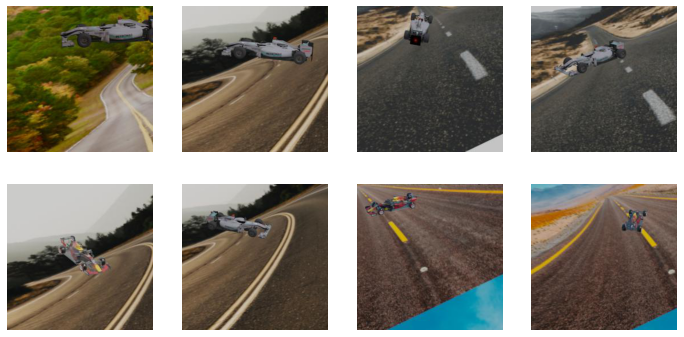

In [ ]:
test_dls.show_batch()

## Predict Test Set
Predict on the test set and you are all set to make the submission!

In [ ]:
_,_,results = learn.get_preds(dl = test_dls, with_decoded = True)

results = [class_to_label_mapping[i] for i in results.numpy()]

## Save the prediction to csv

### 🚧 Note :    
- Do take a look at the submission format.   
- The submission file should contain a header.   
- Follow all submission guidelines strictly to avoid inconvenience.

In [ ]:
submission = pd.DataFrame({"ImageID":test_img_ids, "label":results})
submission

,ImageID,label
0,2535,mercedes
1,7227,mercedes
2,6151,mercedes
3,7123,mercedes
4,1203,redbull
...,...,...
9995,7461,redbull
9996,9849,mercedes
9997,2649,mercedes
9998,8069,mercedes


In [ ]:
submission.to_csv("submission.csv", index=False)

## Making Direct Submission thought Aicrowd CLI

In [ ]:
!aicrowd submission create -c f1-team-classification -f submission.csv

submission.csv ━━━━━━━━━━━━━━━━━━ 100.0% • 135.1/133.4 KB • 614.4 kB/s • 0:00:00
                                                    ╭─────────────────────────╮                                                     
                                                    │ Successfully submitted! │                                                     
                                                    ╰─────────────────────────╯                                                     
                                                          Important links                                                           
┌──────────────────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-8/problems/f1-team-classification/submissions/136936              │
│                  │                                                                                                     